In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

# Set up the directory paths for training and validation data
train_dir = 'data/train'
test_dir = 'data/test'

# Image dimensions
IMG_HEIGHT = 150
IMG_WIDTH = 150

# Set up ImageDataGenerators for training and validation data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Load and iterate the images from the directories
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=32,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=32,
    class_mode='binary'
)


Found 10 images belonging to 3 classes.
Found 4 images belonging to 3 classes.


In [2]:
from tensorflow.keras import layers, models

model = models.Sequential([
    # Convolutional layer with 32 filters and a 3x3 kernel
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    layers.MaxPooling2D((2, 2)),

    # Add another convolutional layer with 64 filters
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Add another convolutional layer with 128 filters
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Flatten the output of the previous layer
    layers.Flatten(),

    # Fully connected (dense) layer
    layers.Dense(512, activation='relu'),

    # Output layer with one unit for binary classification (man or woman)
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [3]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10,
    validation_data=test_generator,
    validation_steps=test_generator.samples // test_generator.batch_size
)


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.5000 - loss: 0.5890 - val_accuracy: 0.5000 - val_loss: -10.5411
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.5000 - loss: -9.4176 - val_accuracy: 0.5000 - val_loss: -32.5048
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 980ms/step - accuracy: 0.5000 - loss: -28.9414 - val_accuracy: 0.5000 - val_loss: -74.5552
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.5000 - loss: -62.9609 - val_accuracy: 0.5000 - val_loss: -149.4088
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.5000 - loss: -130.7049 - val_accuracy: 0.5000 - val_loss: -271.3776
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 797ms/step - accuracy: 0.5000 - loss: -252.6587 - val_accuracy: 0.5000 - val_loss: -460.3520
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.5000 - loss: -399.7418 - val_accuracy: 0.5000 - val_loss: -748.7859
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.5000 - loss: -681.4679 - val_accuracy: 0.5000 - val

In [4]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc * 100:.2f}%")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - accuracy: 0.5000 - loss: -2624.2810
Test Accuracy: 50.00%


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
Predicted: Woman


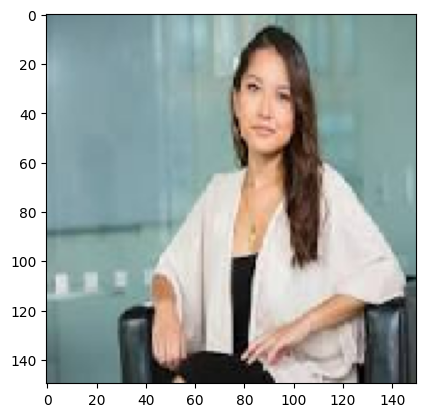

In [8]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Load an image for prediction
img_path = '/content/data/sample/womentest.jpg'
img = image.load_img(img_path, target_size=(IMG_HEIGHT, IMG_WIDTH))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array = img_array / 255.0  # Normalize the image

# Make a prediction
prediction = model.predict(img_array)

# Output prediction
if prediction[0] > 0.5:
    print("Predicted: Woman")
else:
    print("Predicted: Man")

# Display the image
plt.imshow(img)
plt.show()


In [6]:
import os
os.getcwd()

'/content'

In [7]:
os.listdir('/content/data/sample/')

['womentest.jpg']